In [39]:
import pymysql 
from sqlalchemy import create_engine 
import pandas as pd

In [40]:
import getpass

In [41]:
password = getpass.getpass ()

········


In [42]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine= create_engine(connection_string)

## 0.3 Initial query on loans to check everything works

In [53]:
# dataframe creation

df=pd.read_sql_query('Select * from loan', engine)

## 0.4 aggregated quert to select summary rows of loans

In [59]:
dloans=pd.read_sql_query('''select 
d.A2 as districtname, d.A3 as region,
sum(l.amount) as totalborrrowed, 
count(l.loan_id) as noofloanstaken,
round(avg(l.amount)) as avgloanvalue
 from loan l
join account a using(account_id)
join district d on 
a.district_id= d.A1
group by d.A2, d.A3
order by sum(l.amount) DESC
limit 30''', engine);

In [60]:
dloans

,districtname,region,totalborrrowed,noofloanstaken,avgloanvalue
0,Hl.m. Praha,Prague,12932412.0,84,153957.0
1,Brno - mesto,south Moravia,4049400.0,24,168725.0
2,Ostrava - mesto,north Moravia,3260220.0,20,163011.0
3,Karvina,north Moravia,3059820.0,24,127493.0
4,Zlin,south Moravia,3012768.0,17,177222.0
5,Prachatice,south Bohemia,2356692.0,14,168335.0
6,Olomouc,north Moravia,2287596.0,14,163400.0
7,Usti nad Orlici,east Bohemia,2213160.0,14,158083.0
8,Svitavy,east Bohemia,2100084.0,12,175007.0
9,Kutna Hora,central Bohemia,2095980.0,9,232887.0


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

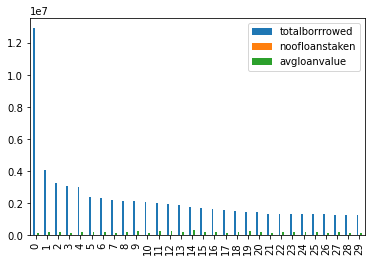

In [63]:
plotdata= dloans
plotdata.plot(kind='bar')